# Week 3 Notebook - Parametric Classification and Dimensionality Reduction 
(with Sentiment Analysis)

Saving mlclass2.py to mlclass2.py


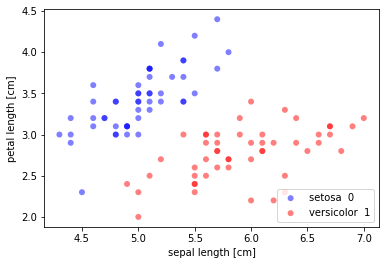

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Only required if using Google colab
from google.colab import files

src = list(files.upload().values())[0]

open('mlclass(6).py','wb').write(src)

import mlclass2
# till here
from mlclass2 import simplemetrics, plot_decision_2d_lda

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# plot data
plt.scatter(X[:50, 0], X[:50, 1],alpha=0.5, c='b', edgecolors='none', label='setosa %2s'%(y[0]))
plt.scatter(X[50:100, 0], X[50:100, 1],alpha=0.5, c='r', edgecolors='none', label='versicolor %2s'%(y[50]))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

Check to see if the dimensions are normally distributed by checking scatter plots. Alternatively,check the Shapiro-Wilks test; when the p-value is below 0.05, it is likely the data is NOT normally distributed.

Setosa Dimension 1 Shapiro-Wilks test p-value:  0.4595065116882324
Setosa Dimension 2 Shapiro-Wilks test p-value:  0.20465604960918427
Setosa Scatter Matrix


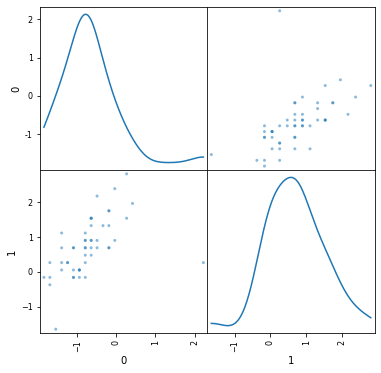

In [ ]:
from scipy.stats import shapiro
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
print("Setosa Dimension 1 Shapiro-Wilks test p-value: ", shapiro(X_scaled[0:50,0])[1])
print("Setosa Dimension 2 Shapiro-Wilks test p-value: ", shapiro(X_scaled[0:50,1])[1])
print("Setosa Scatter Matrix")
scatter_matrix(pd.DataFrame(X_scaled).loc[:50], alpha=0.5, figsize=(6, 6),diagonal='kde');

Setosa Dimension 1 Shapiro-Wilks test p-value:  0.46474820375442505
Setosa Dimension 2 Shapiro-Wilks test p-value:  0.3379843533039093
Versicolor Scatter Matrix [[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43402d290>


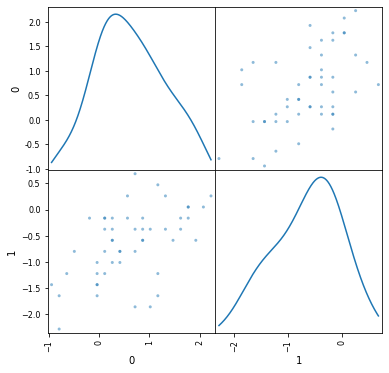

In [ ]:
print("Setosa Dimension 1 Shapiro-Wilks test p-value: ", shapiro(X_scaled[50:100,0])[1])
print("Setosa Dimension 2 Shapiro-Wilks test p-value: ", shapiro(X_scaled[50:100,1])[1])
print("Versicolor Scatter Matrix", scatter_matrix(pd.DataFrame(X_scaled).loc[50:100], alpha=0.5, figsize=(6, 6), diagonal='kde'));

## Quadratic Discriminant Analysis on Iris

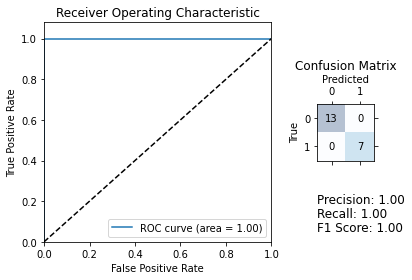

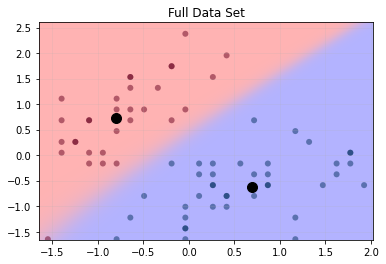

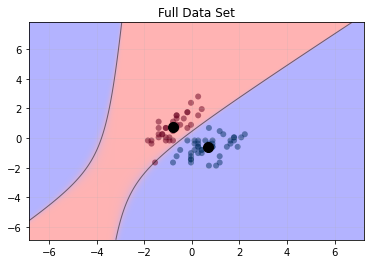

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
predicted = qda.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(qda,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=True)
plot_decision_2d_lda(qda,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=True)

## Linear Discriminant on Iris

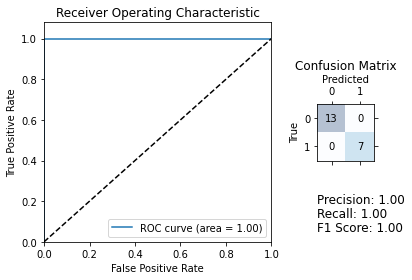

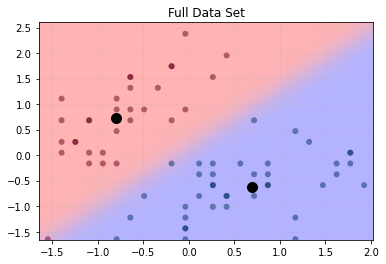

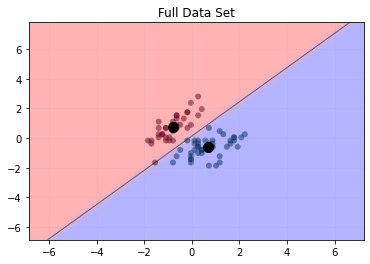

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
predicted = lda.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(lda,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=True)
plot_decision_2d_lda(lda,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=True)

## Gaussian Naive Bayes on Iris

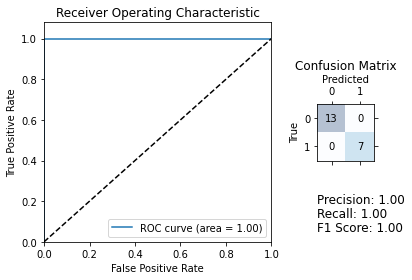

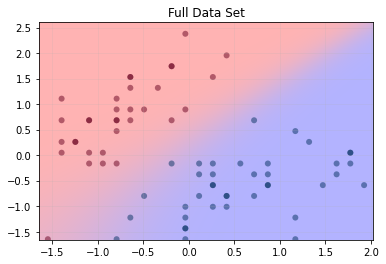

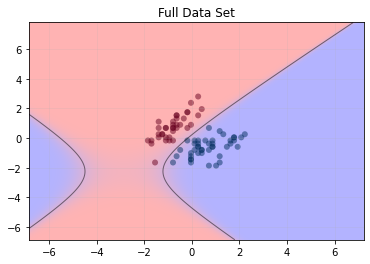

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predicted = gnb.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(gnb,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=False)
plot_decision_2d_lda(gnb,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=False)

# Sentiment Analysis using Naive Bayes

A big data machine learning problem: predicting the sentiment of movie reviews using Multinomial Naive Bayes. Referencing chapter 8 in Rashka and
<a href="http://radimrehurek.com/data_science_python/">Practical Data Science in Python: Spam Filter</a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

np.random.seed(47)

# If you are NOT using google colab, you need to take this part out starting from here
from google.colab import files

uploaded=files.upload()
# till here

reviews = pd.read_csv('./movie_data.csv')
print(reviews.head())
print(reviews.tail())

Saving movie_data.csv to movie_data.csv
                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1
                                                  review  sentiment
49995  Towards the end of the movie, I felt it was to...          0
49996  This is the kind of movie that my enemies cont...          0
49997  I saw 'Descent' last night at the Stockholm Fi...          0
49998  Some films that you pick up for a pound turn o...          0
49999  This is one of the dumbest films, I've ever se...          0


Remove HTML tags from the data.

In [ ]:
reviews.loc[3][0]

"I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. <br /><br />This is one I'd recommend to anyone."

In [ ]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [ ]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [ ]:
reviews['review'] = reviews['review'].apply(preprocessor)

In [ ]:
reviews.loc[3][0]

'i saw this film in a sneak preview and it is delightful the cinematography is unusually creative the acting is good and the story is fabulous if this movie does not do well it won t be because it doesn t deserve to before this film i didn t realize how charming shia lebouf could be he does a marvelous self contained job as the lead there s something incredibly sweet about him and it makes the movie even better the other actors do a good job as well and the film contains moments of really high suspense more than one might expect from a movie about golf sports movies are a dime a dozen but this one stands out this is one i d recommend to anyone '

We also need to randomize the order of reviews.

In [ ]:
import numpy as np

reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                                  review  sentiment
48243  i just watched this film 15 minutes ago and i ...          0
48967  dave devon sawa and his friends sam jason sege...          0
36155  this is one of the funniest movies i have ever...          1
11305  i read a viciously hidden remarks on a previou...          1
23749  this film is just another waste of time the pl...          0
                                                  review  sentiment
25267  genre dinosaur animation new york time travel ...          1
23112  although i had previously watched this one som...          0
11528  jean pierre melville s le cercle rouge follows...          1
47431  i agree with most of the columbo fans that thi...          0
38023  quite honestly the omega code is the worst mov...          0


## Basic Stats

View aggregate statistics with Pandas:

In [ ]:
reviews.groupby('sentiment').describe()

review                                                               
           count unique                                                top freq
sentiment                                                                      
0          25000  24695  this show comes up with interesting locations ...    3
1          25000  24882  loved today s show it was a variety and not so...    5

Message length

In [ ]:
reviews['length'] = reviews['review'].map(lambda text: len(text))
print(reviews.head())

                                                  review  sentiment  length
48243  i just watched this film 15 minutes ago and i ...          0    1326
48967  dave devon sawa and his friends sam jason sege...          0    1036
36155  this is one of the funniest movies i have ever...          1     306
11305  i read a viciously hidden remarks on a previou...          1     748
23749  this film is just another waste of time the pl...          0     600


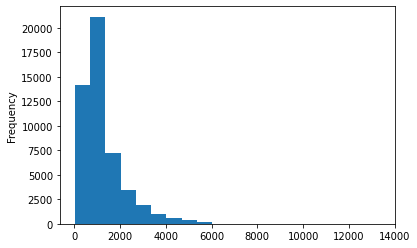

In [ ]:
reviews.length.plot(bins=20, kind='hist')

In [ ]:
reviews.length.describe()

count    50000.000000
mean      1253.940420
std        947.537389
min         31.000000
25%        672.000000
50%        930.000000
75%       1521.000000
max      13335.000000
Name: length, dtype: float64

What are some short reviews?

In [ ]:
print(list(reviews.review[reviews.length < 60].index))
print(list(reviews.review[reviews.length < 60]))

[17466, 23467, 19607, 21705, 21499, 38568, 41479]
['i hope this group of film makers never re unites ', 'more suspenseful more subtle much much more disturbing ', 'primary plot primary direction poor interpretation ', 'what a script what a story what a mess ', 'read the book forget the movie ', 'this movie is terrible but it has some good effects ', 'i wouldn t rent this one even on dollar rental night ']


Is there any difference in message length between positive and negative reviews?

CPU times: user 125 ms, sys: 6.85 ms, total: 132 ms
Wall time: 139 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4263db310>,
      dtype=object)

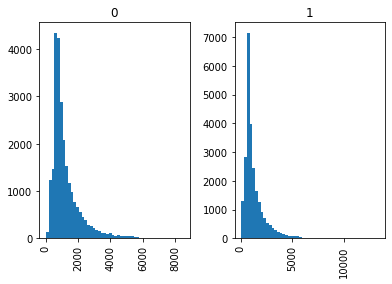

In [ ]:
%%time
reviews.hist(column='length', by='sentiment', bins=50)

## Bag of Words

Massage the raw messages (sequence of characters) into vectors (sequences of numbers).

The mapping is not 1-to-1; this uses the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.
First, a function that will split a message into its individual words:

In [ ]:
def split_into_tokens(review):
    review = str(review) # convert bytes into proper unicode
    return TextBlob(review).words

Here are some of the original texts again:
    

In [2]:
reviews.review.head()

NameError: name 'reviews' is not defined

...and here are the same messages, tokenized:

In [36]:
import nltk
nltk.download('punkt')

reviews.review.head().apply(split_into_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


48243    [i, just, watched, this, film, 15, minutes, ag...
48967    [dave, devon, sawa, and, his, friends, sam, ja...
36155    [this, is, one, of, the, funniest, movies, i, ...
11305    [i, read, a, viciously, hidden, remarks, on, a...
23749    [this, film, is, just, another, waste, of, tim...
Name: review, dtype: object

NLP questions:

1. Do capital letters carry information?
2. Does distinguishing inflected form ("goes" vs. "go") carry information?
3. Do interjections, determiners carry information?

In other words, we want to better "normalize" the text.

With textblob, detect [part-of-speech (POS)](http://www.ling.upenn.edu/courses/Fall_2007/ling001/penn_treebank_pos.html) tags with:

In [38]:
import nltk
nltk.download('averaged_perceptron_tagger')

TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

remove stopwords and normalize words into their base form ([lemmas](http://en.wikipedia.org/wiki/Lemmatisation)) with:

In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [3]:
import nltk
nltk.download('wordnet')
def split_into_lemmas(review):
    review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.review.head().apply(split_into_lemmas)

[nltk_data] Error loading wordnet: <urlopen error [Errno 110]
[nltk_data]     Connection timed out>


NameError: name 'reviews' is not defined

## Data to vectors

Now convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

This requires essentially three steps, in the bag-of-words model:

1. counting how many times does a word occur in each message (term frequency)
2. weighting the counts, so that frequent tokens get lower weight (inverse document frequency)
3. normalizing the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector has as many dimensions as there are unique words in the reviews corpus:

**Note: This will take a while.**

In [43]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['review'])
print(len(bow_transformer.vocabulary_))

94247
CPU times: user 2min 38s, sys: 427 ms, total: 2min 38s
Wall time: 2min 39s


Using 'scikit-learn'

Take one text message and get its bag-of-words counts as a vector, putting to use `bow_transformer`:

In [44]:
review4 = reviews['review'][17466]
print(review4)

#tweet4 = tweets['tweet'][17466]
#print(tweet4)

i hope this group of film makers never re unites 


In [45]:
bow4 = bow_transformer.transform([review4])
print(bow4)

  (0, 30662)	1
  (0, 36104)	1
  (0, 39593)	1
  (0, 51011)	1
  (0, 57511)	1
  (0, 87637)	1


The bag-of-words counts for the entire reviews corpus are a large, sparse matrix:

**The following will take about as long as the last long cell. **

In [46]:
%%time
reviews_bow = bow_transformer.transform(reviews['review'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))#non_zero/rows*columns

sparse matrix shape: (50000, 94247)
number of non-zeros: 4803614
sparsity: 0.10%
CPU times: user 2min 39s, sys: 383 ms, total: 2min 39s
Wall time: 2min 40s


## Train-Test Split

Split the reviews and their sentiment label into training and testing sets, using the first 40,000 reviews for training and the remaining for testing.

In [47]:
reviews_bow_train = reviews_bow[:40000]
reviews_bow_test = reviews_bow[40000:]
reviews_sentiment_train = reviews['sentiment'][:40000]
reviews_sentiment_test = reviews['sentiment'][40000:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)

(40000, 94247)
(10000, 94247)


(There are a multitude of ways in which data can be proprocessed and vectorized. These two steps, also called "feature engineering", are typically the most time consuming and "un-fun" parts of building a predictive pipeline, but they are very important and require some experience. The trick is to evaluate constantly: analyze model for the errors it makes, improve data cleaning & preprocessing, brainstorm for new features, evaluate...)

## Training a model, finding sentiment

With messages represented as vectors, finally train the sentiment classifier.

Using scikit-learn, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [48]:
%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)

CPU times: user 49.5 ms, sys: 2 ms, total: 51.5 ms
Wall time: 58.5 ms


Classifying our single random message:

In [49]:
print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.sentiment[17466])

predicted: 0
expected: 0


A natural question is to ask, how many messages do we classify correctly overall?

In [50]:
predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)

[0 0 1 ... 1 1 0]


In [51]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.8618
confusion matrix
 [[4395  603]
 [ 779 4223]]
(row=expected, col=predicted)


From the confusion matrix compute precision and recall or F1:

In [52]:
print(classification_report(reviews_sentiment_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4998
           1       0.88      0.84      0.86      5002

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Testing the system to verify it works for new reviews:

In [53]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=5),"\n")

predict_review('Horrible. Terrible. Dreadful. Awful. Pile of garbage. Junk.')
predict_review('Fantastic. Amazing. Terrific. Classic. Best! Extraordinary. Authentic. Ideal. Vibrant. Powerful. Perfect. Imaginative. Incredible. Happy. Love. Pleasure.')
predict_review('Okay. Great.')

Horrible. Terrible. Dreadful. Awful. Pile of garbage. Junk. [[1. 0.]] 

Fantastic. Amazing. Terrific. Classic. Best! Extraordinary. Authentic. Ideal. Vibrant. Powerful. Perfect. Imaginative. Incredible. Happy. Love. Pleasure. [[0. 1.]] 

Okay. Great. [[0.49974 0.50026]] 



In [54]:
predict_review('Sharknado is the best movie of the century. \
 The lighting, the acting, the cinematography. All were magnificent. \
 I shall not see another movie as exceptional as this in my life time.')
predict_review('Murray, with his curious blend of pathos and aggressiveness, is terrific, and so is an acutely uptight Dreyfuss, never once copping a plea for our sympathy.')
predict_review('Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz\'s antic direction calls for hand-waving hysteria.')
predict_review('To say that the movie loses the plot would not be strictly accurate, for that would imply that there was a plot to lose.')

Sharknado is the best movie of the century.  The lighting, the acting, the cinematography. All were magnificent.  I shall not see another movie as exceptional as this in my life time. [[0.02608 0.97392]] 

Murray, with his curious blend of pathos and aggressiveness, is terrific, and so is an acutely uptight Dreyfuss, never once copping a plea for our sympathy. [[0.01501 0.98499]] 

Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz's antic direction calls for hand-waving hysteria. [[0.06518 0.93482]] 

To say that the movie loses the plot would not be strictly accurate, for that would imply that there was a plot to lose. [[0.94552 0.05448]] 



# Dimensionality Reduction

In [55]:
import pandas as pd

df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
df_wine['Class label'].unique()

array([1, 2, 3])

In [57]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Sequential feature selection algorithms: Backward Selection

In [59]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

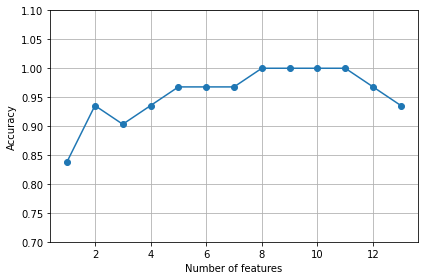

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [61]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Proanthocyanins', 'Color intensity',
       'Proline'],
      dtype='object')


In [62]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 0.9444444444444444


In [63]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 1.0
Test accuracy: 1.0


## Principle Component Analysis

In [64]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])

### Total and Explained Variance

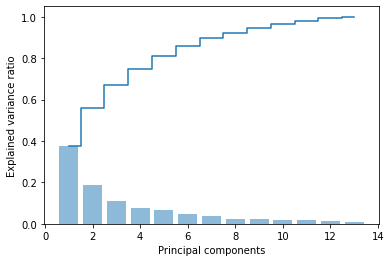

In [65]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [66]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

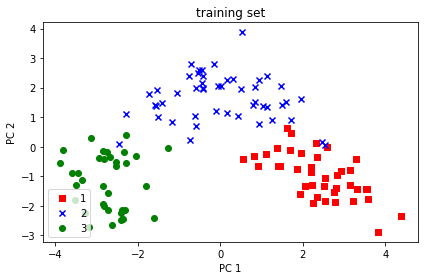

In [67]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.title('training set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

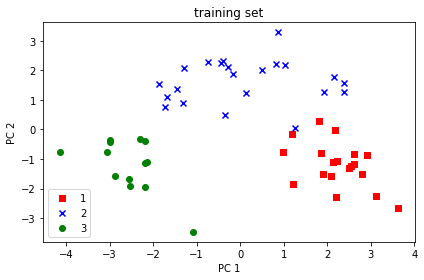

In [68]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test == l, 0], 
                X_test_pca[y_test == l, 1], 
                c=c, label=l, marker=m)
plt.title('training set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## <span style="color:red">Programming Assignment 3: Disaster Detector/Install Keras and Theano</span>

In this section of the notebook, implement using the <a href="https://www.crowdflower.com/data-for-everyone/">"Disasters on social media"</a> dataset from Crowdflower with the code presented in the Multinomial Naive Bayes section above. 

Recall that in Pandas, you subset a dataframe with square brackets after the dataframe name, this code selects the class column from the tweets dataframe:
<code>tweets['class']</code>

I start you off with code that imports the dataset.

You need to complete the following steps:

1. Remove any HTML and Emoticons from the tweets. 
2. Reindex the tweets dataframe so the rows are in random order.
3. Download stopwords from the NLTK, remove them from the tweets.
4. Create a bag-of-words for the tweets. Convert the words to lemmas and remove any stop words.
5. Split the tweets into a training and testing set, using the first 8000 tweets for training and the remaining for testing. (Do not use Scikit-learn, use the code presented above to subset the data.)
6. Apply Multinomial Naive Bayes model, show the precision and recall scores for the positive and negative classes.
7. Test your model with some text.

On testing your model, you should get results similar to this:

<code>Cat stuck in a tree. [[ 0.28597  0.71403]] 
Car accident. Major damage to property. [[ 0.22223  0.77777]] 
I ate a sandwich last night. [[ 0.97343  0.02657]] 
Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz's antic direction calls for hand-waving hysteria. [[ 0.9916  0.0084]] </code>

In [6]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

tweets = pd.read_csv('socialmedia-disaster-tweets-DFE.csv',encoding='latin1')[['text','choose_one']]
tweets.columns = ['tweet','class']
tweets = tweets[(tweets['class'] == 'Relevant') | (tweets['class'] == 'Not Relevant')]
tweets = tweets.reset_index(drop=True)
tweets.tail()

,tweet,class
10855,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant
10856,Police investigating after an e-bike collided ...,Relevant
10857,The Latest: More Homes Razed by Northern Calif...,Relevant
10858,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant
10859,#CityofCalgary has activated its Municipal Eme...,Relevant


In [7]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [8]:
preprocessor("</a>This :) is :( a test :-)!")


'this is a test :) :( :)'

In [9]:
tweets['tweet'] = tweets['tweet'].apply(preprocessor)

In [10]:
tweets.loc[3][0]

'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all'

In [11]:
import numpy as np

tweets = tweets.reindex(np.random.permutation(tweets.index))

print(tweets.head())
print(tweets.tail())

                                                  tweet         class
9258    football is back this weekend its just sunk in   Not Relevant
8523   meganrestivo i am literally screaming for you...  Not Relevant
3045  new nyc legionnaires disease death toll rises ...      Relevant
8859               waiting for joel so we can go smoke   Not Relevant
723   christian attacked by muslims at the temple mo...      Relevant
                                                  tweet         class
1614   antpips67 johnejefferson obviously i m aware ...      Relevant
678        caixxum5sos thanks for the damn heart attack  Not Relevant
1119  because you watched honey i blew up the econom...  Not Relevant
9517       udhampuragain 2 terrorist shot dead udhampur      Relevant
1417  genuine leather man bag messenger fit ipad min...  Not Relevant


In [12]:
def split_into_tokens(tweet):
    tweet = str(tweet) # convert bytes into proper unicode
    return TextBlob(tweet).words

In [13]:
tweets.tweet.head()

9258      football is back this weekend its just sunk in 
8523     meganrestivo i am literally screaming for you...
3045    new nyc legionnaires disease death toll rises ...
8859                 waiting for joel so we can go smoke 
723     christian attacked by muslims at the temple mo...
Name: tweet, dtype: object

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('all')
nltk.download('punkt')

tweets.tweet.head().apply(split_into_tokens)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/derrick/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |

[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to /home/derrick/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /home/derrick/nltk_data...
[nltk_data]    |   Unzipping corpora/ppattach.zip.
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     /home/derrick/

9258    [football, is, back, this, weekend, its, just,...
8523    [meganrestivo, i, am, literally, screaming, fo...
3045    [new, nyc, legionnaires, disease, death, toll,...
8859         [waiting, for, joel, so, we, can, go, smoke]
723     [christian, attacked, by, muslims, at, the, te...
Name: tweet, dtype: object

In [ ]:
nltk.download('averaged_perceptron_tagger')

TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/derrick/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('stopwords')

In [ ]:

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [ ]:
nltk.download('wordnet')
def split_into_lemmas(tweet):
    tweet = str(tweet).lower()
    words = TextBlob(tweet).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

tweets.tweet.head().apply(split_into_lemmas)

In [ ]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(tweets['tweet'])
print(len(bow_transformer.vocabulary_))


In [ ]:

print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweetstweets_bow.shape[1])))#non_zero/rows*columns
%%time
tweets_bow = bow_transformer.transform(tweets)
print('sparse matrix shape:', tweets_bow.shape)
print('number of non-zeros:', tweets_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweetstweets_bow.shape[1])))#non_zero/rows*columns


In [ ]:
%%time
tweets_bow = bow_transformer.transform(tweets)
print('sparse matrix shape:', tweets_bow.shape)
print('number of non-zeros:', tweets_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweetstweets_bow.shape[1])))#non_zero/rows*columns

In [ ]:
tweets_bow_train = tweets_bow[:40000]
tweets_bow_test = tweets_bow[40000:]
tweets_sentiment_train = tweets['sentiment'][:40000]
tweets_sentiment_test = tweets['sentiment'][40000:]

print(tweets_bow_train.shape)
print(tweets_bow_test.shape)

In [ ]:
%time tweets_sentiment = MultinomialNB().fit(tweets_bow_train, tweets_sentiment_train)

In [ ]:
print('predicted:', tweets_sentiment.predict(bow4)[0])
print('expected:', tweets.sentiment[17466])

In [ ]:
predictions = tweets_sentiment.predict(tweets_bow_test)
print(predictions)

In [ ]:
print('accuracy', accuracy_score(tweets_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(tweets_sentiment_test, predictions))
print('(row=expected, col=predicted)')

In [ ]:
print(classification_report(tweets_sentiment_test, predictions))

In [ ]:
def predict_tweets(new_tweet): 
    new_sample = bow_transformer.transform([new_tweet])
    print(new_tweet, np.around(tweets_sentiment.predict_proba(new_sample), decimals=5),"\n")

predict_tweets('Horrible. Terrible. Dreadful. Awful. Pile of garbage. Junk.')
predict_tweets('Fantastic. Amazing. Terrific. Classic. Best! Extraordinary. Authentic. Ideal. Vibrant. Powerful. Perfect. Imaginative. Incredible. Happy. Love. Pleasure.')
predict_tweets('Okay. Great.')

In [ ]:
predict_tweets('Cat stuck in a tree.')
predict_tweets('Car accident. Major damage to property.')
predict_tweets('I ate a sandwich last night.')

## <span style="color:red">Install Keras and Theano</span>

Keras will be used in weeks 4, 5, and 6. 

In [ ]:

import keras